In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [3]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

fixed = [False, True, True, False, True, False]

In [4]:
beta1 = jsm_mcmc.Chain("../../../data/Feature_Recovery/beta_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

beta2 = jsm_mcmc.Chain("../../../data/Feature_Recovery/beta_permutations/mock_2/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

beta3 = jsm_mcmc.Chain("../../../data/Feature_Recovery/beta_permutations/mock_3/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

beta4 = jsm_mcmc.Chain("../../../data/Feature_Recovery/beta_permutations/mock_4/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)

In [5]:
beta1.samples.shape

(1500, 100, 6)

In [6]:
fid_theta = [10.5, 2.5, 0.2, 0, 0.2, 0]

In [7]:
data = jsm_models.INIT_DATA(fid_theta, "../../mcmc/Feature_Recovery/beta_permutations/mock_1/mock_data.npy")
data.get_stats(min_mass=6.5)

print("defining the forward model")
models = jsm_models.LOAD_MODELS("../../../data/MW-analog/meta_data_psi3/", Nsamples=1)

def lnprior(theta):
    chi2_pr = ((theta[0] - 10.5) / 0.1) ** 2
    if priors[1][0] < theta[1] < priors[1][1] and\
        priors[2][0] < theta[2] < priors[2][1] and\
         priors[3][0] < theta[3] < priors[3][1] and\
          priors[4][0] < theta[4] < priors[4][1] and\
           priors[5][0] < theta[5] < priors[5][1]:
        lp = 0.0
    else:
        lp = -np.inf
    return lp + (-chi2_pr / 2.0)

def lnlike(theta):
    models.get_stats(theta, 6.5, jsm_SHMR.general)
    lnL_Pnsat = jsm_stats.lnL_PNsat(data, models)
    lnL_KS_max = jsm_stats.lnL_KS_max(data, models)
    lnL = lnL_Pnsat + lnL_KS_max 
    return lnL, lnL_Pnsat, lnL_KS_max


defining the forward model


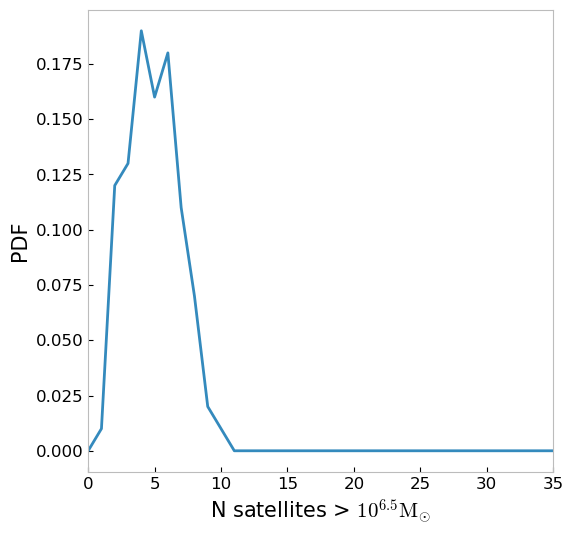

In [8]:
data.stat.Pnsat_plot()

In [11]:
lnlike(beta1.samples[103, 0 ,:])

(-213.72910127855468, -207.26988635275723, -6.459214925797441)

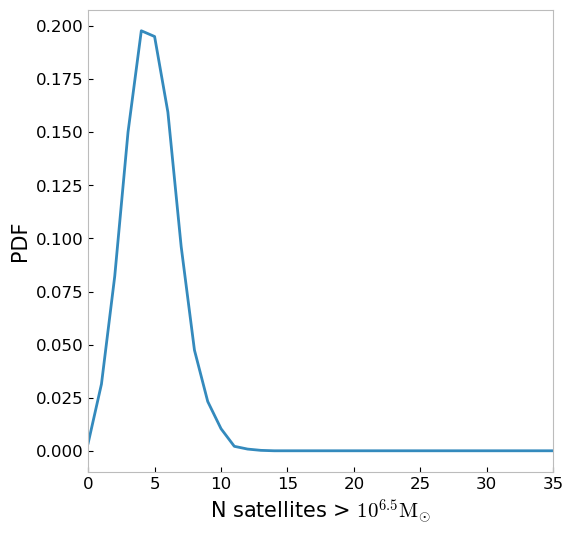

In [12]:
models.stat.Pnsat_plot()

In [16]:
for i, theta in enumerate(beta1.samples[90:120, 1 ,:]):
    print(i, theta)

0 [10.5         2.57008429  0.32965521  0.          0.2282469   0.        ]
1 [10.5         2.57609649  0.32052754  0.          0.23401282  0.        ]
2 [10.5         2.49309104  0.36911662  0.          0.18683161  0.        ]
3 [10.5         2.55696776  0.3017167   0.          0.22394053  0.        ]
4 [10.5         2.48026379  0.39996358  0.          0.17877493  0.        ]
5 [10.5         2.41589114  0.28441221  0.          0.17205708  0.        ]
6 [10.5         2.53118168  0.2312102   0.          0.22911063  0.        ]
7 [10.5         2.53118168  0.2312102   0.          0.22911063  0.        ]
8 [10.5         2.53118168  0.2312102   0.          0.22911063  0.        ]
9 [10.5         2.55466998  0.18067904  0.          0.24160407  0.        ]
10 [10.5        2.5352375  0.1892916  0.         0.231328   0.       ]
11 [10.5        2.5352375  0.1892916  0.         0.231328   0.       ]
12 [10.5         2.56383333  0.16186702  0.          0.24459481  0.        ]
13 [10.5         3.81

In [14]:
for i, theta in enumerate(beta1.samples[90:150, 1 ,:]):
    # print(lnlike(theta))
    lnL, lnL_Pnsat, lnL_KS_max = lnlike(theta)
    if np.isinf(lnL):
        print(i, theta)

13 [10.5         3.81423336  0.54243932  0.          0.83189968  0.        ]
14 [10.5         4.70778681  0.96350303  0.          1.2406521   0.        ]
15 [10.5         4.41561202  0.8414249   0.          1.10575241  0.        ]
16 [10.5         4.28279022  0.78592854  0.          1.0444274   0.        ]
17 [10.5         5.47246669  0.98106553  0.          1.64408124  0.        ]
18 [10.5         5.14464635  0.96729402  0.          1.47400423  0.        ]
19 [10.5         5.08593516  0.94908612  0.          1.44617496  0.        ]
20 [10.5         5.29844984  1.02155122  0.          1.54890875  0.        ]
21 [10.5         5.16434393  0.71073867  0.          1.54922547  0.        ]
22 [10.5         5.16434393  0.71073867  0.          1.54922547  0.        ]
23 [10.5         5.16434393  0.71073867  0.          1.54922547  0.        ]
24 [10.5         5.16434393  0.71073867  0.          1.54922547  0.        ]
25 [10.5         5.17618722  0.71376372  0.          1.55517562  0.        ]

In [42]:
alpha1 = jsm_mcmc.Chain("../../../data/Feature_Recovery/sigma_permutations/mock_1/chain.h5", fixed=fixed, Nstack=500, Nburn=500, Nthin=15)


In [43]:
sum(np.isinf(alpha1.blobs["lnL_N"]))

0